In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot
import healpy as hp
%matplotlib inline
%load_ext autoreload
%autoreload 2

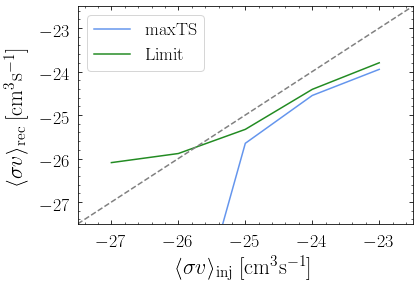

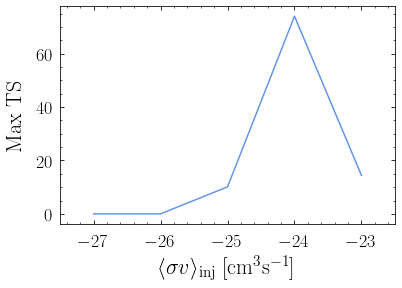

In [18]:
nmc = 1

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
max_TS_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_injsig10' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=500, 
                        halos_to_keep=500,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        elephantm = [0],
                       skip_halos=[0]) # 0 for 10 GeV
    limit_ary_temp, xsec_max_ary_temp, maxTS_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,0,:]
    limit_ary[idm] = limit_ary_temp[-1,0,:]
    max_TS_ary[idm] = maxTS_ary_temp[-1,0,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-23,-28,-1),  xsec_max[0], xsec_max[2], alpha=0.2)
plt.plot(np.arange(-23,-28,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-23,-28,-1),  lims[0], lims[2], alpha=0.2)
plt.plot([-28,-21],[-28,-21],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")
plt.ylim(-27.5,-22.5)
plt.xlim(-27.5,-22.5)
plt.legend()
plt.show()

max_TS = np.log10(np.percentile(10**max_TS_ary, [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  max_TS[1], label='max TS')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("Max TS")
plt.xlim(-27.5,-22.5)
plt.show()

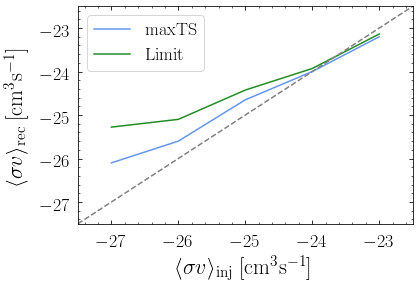

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in power
/tigress/smsharma/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


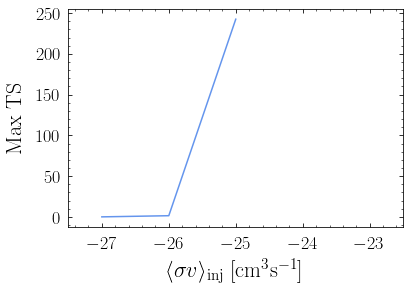

In [19]:
nmc = 1

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
max_TS_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_noebinless7_injsig10' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=500, 
                        halos_to_keep=500,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        elephantm = [0],
                       skip_halos=[0]) # 0 for 10 GeV
    limit_ary_temp, xsec_max_ary_temp, maxTS_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,0,:]
    limit_ary[idm] = limit_ary_temp[-1,0,:]
    max_TS_ary[idm] = maxTS_ary_temp[-1,0,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-23,-28,-1),  xsec_max[0], xsec_max[2], alpha=0.2)
plt.plot(np.arange(-23,-28,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-23,-28,-1),  lims[0], lims[2], alpha=0.2)
plt.plot([-28,-21],[-28,-21],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")
plt.ylim(-27.5,-22.5)
plt.xlim(-27.5,-22.5)
plt.legend()
plt.show()

max_TS = np.log10(np.percentile(10**max_TS_ary, [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  max_TS[1], label='max TS')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("Max TS")
plt.xlim(-27.5,-22.5)
plt.show()

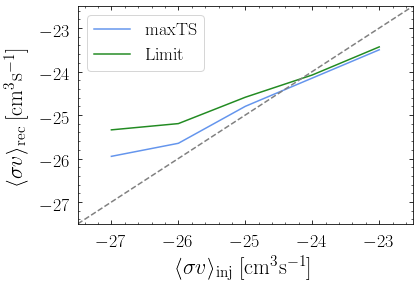

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in power


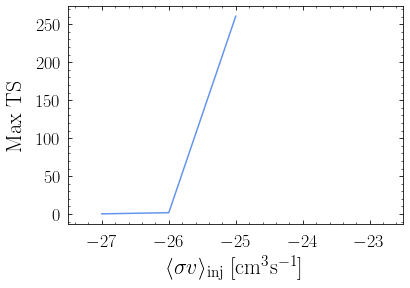

In [22]:
nmc = 1

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
max_TS_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_injsig10' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=500, 
                        halos_to_keep=500,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        file_prefix='LL2_TSmx_lim_b_emin6_o',
                        elephantm = [0],
                       skip_halos=[0]) # 0 for 10 GeV
    limit_ary_temp, xsec_max_ary_temp, maxTS_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,0,:]
    limit_ary[idm] = limit_ary_temp[-1,0,:]
    max_TS_ary[idm] = maxTS_ary_temp[-1,0,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-23,-28,-1),  xsec_max[0], xsec_max[2], alpha=0.2)
plt.plot(np.arange(-23,-28,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-23,-28,-1),  lims[0], lims[2], alpha=0.2)
plt.plot([-28,-21],[-28,-21],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")
plt.ylim(-27.5,-22.5)
plt.xlim(-27.5,-22.5)
plt.legend()
plt.show()

max_TS = np.log10(np.percentile(10**max_TS_ary, [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  max_TS[1], label='max TS')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("Max TS")
plt.xlim(-27.5,-22.5)
plt.show()

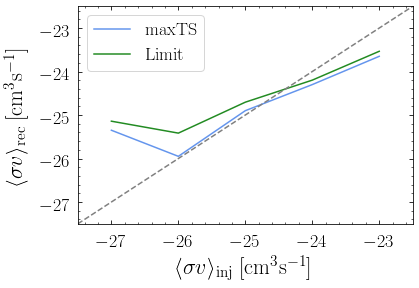

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in power


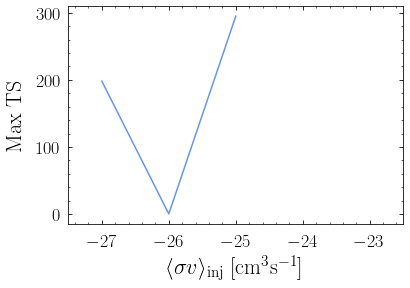

In [23]:
nmc = 1

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
max_TS_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_injsig10' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=500, 
                        halos_to_keep=500,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        file_prefix='LL2_TSmx_lim_b_emin5_o',
                        elephantm = [0],
                       skip_halos=[0]) # 0 for 10 GeV
    limit_ary_temp, xsec_max_ary_temp, maxTS_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,0,:]
    limit_ary[idm] = limit_ary_temp[-1,0,:]
    max_TS_ary[idm] = maxTS_ary_temp[-1,0,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-23,-28,-1),  xsec_max[0], xsec_max[2], alpha=0.2)
plt.plot(np.arange(-23,-28,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-23,-28,-1),  lims[0], lims[2], alpha=0.2)
plt.plot([-28,-21],[-28,-21],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")
plt.ylim(-27.5,-22.5)
plt.xlim(-27.5,-22.5)
plt.legend()
plt.show()

max_TS = np.log10(np.percentile(10**max_TS_ary, [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  max_TS[1], label='max TS')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("Max TS")
plt.xlim(-27.5,-22.5)
plt.show()

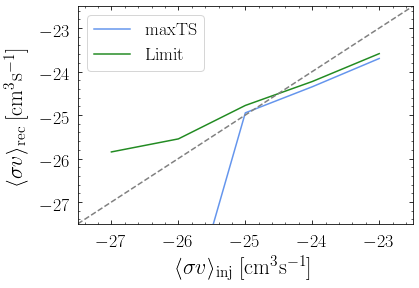

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in power


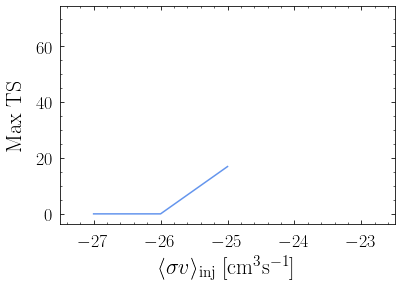

In [24]:
nmc = 1

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
max_TS_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_injsig10' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=500, 
                        halos_to_keep=500,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        elephantm = [0],
                       skip_halos=[0]) # 0 for 10 GeV
    limit_ary_temp, xsec_max_ary_temp, maxTS_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,0,:]
    limit_ary[idm] = limit_ary_temp[-1,0,:]
    max_TS_ary[idm] = maxTS_ary_temp[-1,0,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-23,-28,-1),  xsec_max[0], xsec_max[2], alpha=0.2)
plt.plot(np.arange(-23,-28,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-23,-28,-1),  lims[0], lims[2], alpha=0.2)
plt.plot([-28,-21],[-28,-21],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")
plt.ylim(-27.5,-22.5)
plt.xlim(-27.5,-22.5)
plt.legend()
plt.show()

max_TS = np.log10(np.percentile(10**max_TS_ary, [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  max_TS[1], label='max TS')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("Max TS")
plt.xlim(-27.5,-22.5)
plt.show()

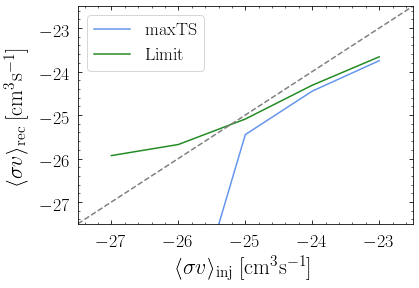

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in power


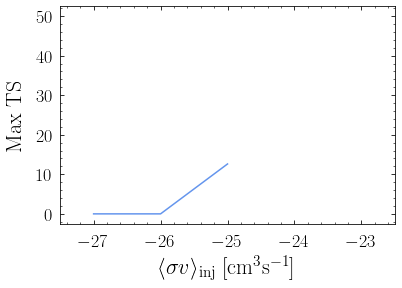

In [25]:
nmc = 1

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
max_TS_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_injsig10' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=500, 
                        halos_to_keep=500,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        file_prefix='LL2_TSmx_lim_b_emin3_o',
                        elephantm = [0],
                       skip_halos=[0]) # 0 for 10 GeV
    limit_ary_temp, xsec_max_ary_temp, maxTS_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,0,:]
    limit_ary[idm] = limit_ary_temp[-1,0,:]
    max_TS_ary[idm] = maxTS_ary_temp[-1,0,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-23,-28,-1),  xsec_max[0], xsec_max[2], alpha=0.2)
plt.plot(np.arange(-23,-28,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-23,-28,-1),  lims[0], lims[2], alpha=0.2)
plt.plot([-28,-21],[-28,-21],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")
plt.ylim(-27.5,-22.5)
plt.xlim(-27.5,-22.5)
plt.legend()
plt.show()

max_TS = np.log10(np.percentile(10**max_TS_ary, [16,50,84], axis=1))

plt.plot(np.arange(-23,-28,-1),  max_TS[1], label='max TS')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("Max TS")
plt.xlim(-27.5,-22.5)
plt.show()